In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
mobility_effects = pd.read_csv('../results/causal_impact/mobility_effects_6_25.csv',index_col=0)
rt_effects = pd.read_csv('../results/causal_impact/rt_effects_6_25.csv',index_col=0)
case_growth_effects = pd.read_csv('../results/causal_impact/case_growth_effects_6_25.csv',index_col=0)
death_rate_effects = pd.read_csv('../results/causal_impact/death_rate_effects_6_25.csv',index_col=0)


In [39]:
cols = ['Phase 1 abs','Phase 2 abs','Phase 3 abs','Phase 4 abs','Phase 5 abs','Phase 6 abs']
mobility_df = mobility_effects[cols]
# df['quantity'] = df['quantity'].apply(lambda x: x*-1)

mobility_df['Phase 5 abs']= mobility_df.apply(lambda x: x*-1)
mobility_df['Phase 6 abs']= mobility_df.apply(lambda x: x*-1)
mobility_df = mobility_df.rename(columns={
    'Phase 1 abs': 'Phase 1', 
    'Phase 2 abs': 'Phase 2',
    'Phase 3 abs': 'Phase 3',
    'Phase 4 abs': 'Phase 4',
    'Phase 5 abs': 'Phase 5',
    'Phase 6 abs': 'Phase 6',
})


rt_df = rt_effects[cols]
rt_df['Phase 5 abs']= rt_df.apply(lambda x: x*-1)
rt_df['Phase 6 abs']= rt_df.apply(lambda x: x*-1)
rt_df = rt_df.rename(columns={
    'Phase 1 abs': 'Phase 1', 
    'Phase 2 abs': 'Phase 2',
    'Phase 3 abs': 'Phase 3',
    'Phase 4 abs': 'Phase 4',
    'Phase 5 abs': 'Phase 5',
    'Phase 6 abs': 'Phase 6',
})

case_growth_df = case_growth_effects[cols]
case_growth_df['Phase 5 abs']= case_growth_df.apply(lambda x: x*-1)
case_growth_df['Phase 6 abs']= case_growth_df.apply(lambda x: x*-1)
case_growth_df = case_growth_df.rename(columns={
    'Phase 1 abs': 'Phase 1', 
    'Phase 2 abs': 'Phase 2',
    'Phase 3 abs': 'Phase 3',
    'Phase 4 abs': 'Phase 4',
    'Phase 5 abs': 'Phase 5',
    'Phase 6 abs': 'Phase 6',
})

death_rate_df = death_rate_effects[cols]
death_rate_df['Phase 5 abs']= death_rate_df.apply(lambda x: x*-1)
death_rate_df['Phase 6 abs']= death_rate_df.apply(lambda x: x*-1)
death_rate_df = death_rate_df.rename(columns={
    'Phase 1 abs': 'Phase 1', 
    'Phase 2 abs': 'Phase 2',
    'Phase 3 abs': 'Phase 3',
    'Phase 4 abs': 'Phase 4',
    'Phase 5 abs': 'Phase 5',
    'Phase 6 abs': 'Phase 6',
})


In [40]:
mobility_df.columns = [str(col) + '_mobility' for col in mobility_df.columns]
rt_df.columns = [str(col) + '_rt' for col in rt_df.columns]
case_growth_df.columns = [str(col) + '_case_growth' for col in case_growth_df.columns]
death_rate_df.columns = [str(col) + '_death_rate' for col in death_rate_df.columns]


In [41]:
death_rate_df.head()

,Phase 1_death_rate,Phase 2_death_rate,Phase 3_death_rate,Phase 4_death_rate,Phase 5_death_rate,Phase 6_death_rate
1,1.157527e-03,-0.001485,-0.001284,-0.000398,-1.157527e-03,-1.157527e-03
2,-8.570000e-05,-0.000161,-0.000174,-0.000099,8.570000e-05,8.570000e-05
3,-4.460000e-05,-0.000089,0.000091,0.000205,4.460000e-05,4.460000e-05
4,3.040000e-07,0.000136,0.000316,0.000453,-3.040000e-07,-3.040000e-07
5,-1.530000e-05,-0.000004,0.000084,0.001136,1.530000e-05,1.530000e-05


In [43]:
merged_df = pd.concat([mobility_df,rt_df,case_growth_df,death_rate_df],axis=1)
merged_df.head()


,Phase 1_mobility,Phase 2_mobility,Phase 3_mobility,Phase 4_mobility,Phase 5_mobility,Phase 6_mobility,Phase 1_rt,Phase 2_rt,Phase 3_rt,Phase 4_rt,...,Phase 3_case_growth,Phase 4_case_growth,Phase 5_case_growth,Phase 6_case_growth,Phase 1_death_rate,Phase 2_death_rate,Phase 3_death_rate,Phase 4_death_rate,Phase 5_death_rate,Phase 6_death_rate
1,7.828003,38.170056,28.707928,28.404871,-7.828003,-7.828003,-0.338702,0.481433,0.814444,0.581236,...,0.051075,0.012318,0.455381,0.455381,1.157527e-03,-0.001485,-0.001284,-0.000398,-1.157527e-03,-1.157527e-03
2,33.784540,40.900482,25.454116,23.833325,-33.784540,-33.784540,-0.303343,1.055994,-1.079819,-1.367304,...,0.046615,0.042699,-0.192121,-0.192121,-8.570000e-05,-0.000161,-0.000174,-0.000099,8.570000e-05,8.570000e-05
3,46.828169,44.193082,32.021887,33.688032,-46.828169,-46.828169,0.239724,0.236168,-0.213304,-1.328627,...,0.075336,-0.155836,0.183251,0.183251,-4.460000e-05,-0.000089,0.000091,0.000205,4.460000e-05,4.460000e-05
4,-4.865518,43.172052,31.858722,30.579258,4.865518,4.865518,-1.134781,-0.967503,-0.566900,-0.536493,...,-0.008509,-0.053986,-0.253521,-0.253521,3.040000e-07,0.000136,0.000316,0.000453,-3.040000e-07,-3.040000e-07
5,16.118588,46.817228,29.936802,21.335996,-16.118588,-16.118588,-1.457311,0.326589,0.239336,-0.635810,...,0.180299,-0.053062,0.134641,0.134641,-1.530000e-05,-0.000004,0.000084,0.001136,1.530000e-05,1.530000e-05


In [45]:
merged_df= merged_df.fillna(0)
merged_df

,Phase 1_mobility,Phase 2_mobility,Phase 3_mobility,Phase 4_mobility,Phase 5_mobility,Phase 6_mobility,Phase 1_rt,Phase 2_rt,Phase 3_rt,Phase 4_rt,...,Phase 3_case_growth,Phase 4_case_growth,Phase 5_case_growth,Phase 6_case_growth,Phase 1_death_rate,Phase 2_death_rate,Phase 3_death_rate,Phase 4_death_rate,Phase 5_death_rate,Phase 6_death_rate
1,7.828003,38.170056,28.707928,28.404871,-7.828003,-7.828003,-0.338702,0.481433,0.814444,0.581236,...,0.051075,0.012318,0.455381,0.455381,1.157527e-03,-0.001485,-0.001284,-0.000398,-1.157527e-03,-1.157527e-03
2,33.784540,40.900482,25.454116,23.833325,-33.784540,-33.784540,-0.303343,1.055994,-1.079819,-1.367304,...,0.046615,0.042699,-0.192121,-0.192121,-8.570000e-05,-0.000161,-0.000174,-0.000099,8.570000e-05,8.570000e-05
3,46.828169,44.193082,32.021887,33.688032,-46.828169,-46.828169,0.239724,0.236168,-0.213304,-1.328627,...,0.075336,-0.155836,0.183251,0.183251,-4.460000e-05,-0.000089,0.000091,0.000205,4.460000e-05,4.460000e-05
4,-4.865518,43.172052,31.858722,30.579258,4.865518,4.865518,-1.134781,-0.967503,-0.566900,-0.536493,...,-0.008509,-0.053986,-0.253521,-0.253521,3.040000e-07,0.000136,0.000316,0.000453,-3.040000e-07,-3.040000e-07
5,16.118588,46.817228,29.936802,21.335996,-16.118588,-16.118588,-1.457311,0.326589,0.239336,-0.635810,...,0.180299,-0.053062,0.134641,0.134641,-1.530000e-05,-0.000004,0.000084,0.001136,1.530000e-05,1.530000e-05
6,11.674969,41.004227,29.517238,29.066060,-11.674969,-11.674969,-0.447727,0.619871,0.417071,0.359591,...,-0.023682,-0.026700,0.619438,0.619438,4.231554e-03,-0.002964,0.078580,0.219955,-4.231554e-03,-4.231554e-03
7,65.031083,39.933199,25.159488,14.151243,-65.031083,-65.031083,-1.117150,3.589617,-4.378664,-0.952891,...,-0.297268,0.161249,0.084500,0.084500,-2.588280e-04,-0.000167,-0.000155,0.000094,2.588280e-04,2.588280e-04
8,14.683279,47.868342,29.841703,34.582335,-14.683279,-14.683279,-1.549529,-0.778930,-0.204043,0.042075,...,0.000401,0.044105,0.012897,0.012897,6.131972e-03,0.019395,-0.005432,-0.006547,-6.131972e-03,-6.131972e-03
9,12.692105,42.386490,31.463394,29.165459,-12.692105,-12.692105,0.000000,0.000000,0.000000,0.000000,...,0.114999,0.134003,0.402789,0.402789,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
10,6.659585,41.777904,30.515434,20.462208,-6.659585,-6.659585,-2.364269,1.099469,-0.555603,-0.614431,...,-0.102803,-0.017471,0.709773,0.709773,-1.592130e-03,0.000406,0.001444,0.000081,1.592130e-03,1.592130e-03


In [46]:
merged_df.to_csv("../results/causal_impact/effects_all.csv",index=False)

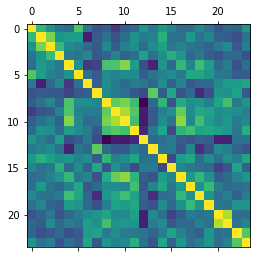

In [37]:

plt.matshow(merged_df.corr(method='spearman'))
plt.show()

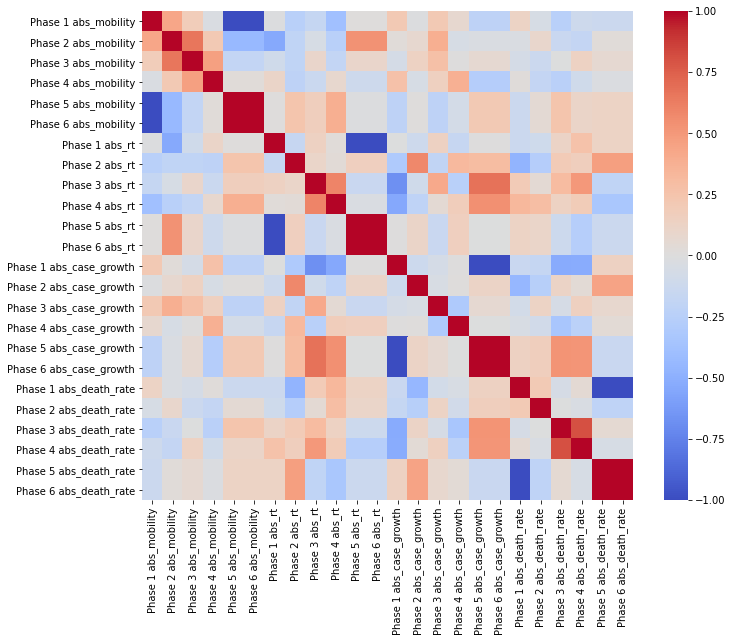

In [25]:
# fig=corr_.style.background_gradient(cmap='coolwarm').set_precision(2)
# plt.savefig("../results/causal_impact/phase_outcome_correlation.png")
# plt.close()
corr_ = merged_df.corr(method='spearman')

f, ax = plt.subplots(figsize=(11, 9))
f.patch.set_facecolor('white')

sns.heatmap(corr_,cmap="coolwarm", annot=False)
plt.show()
# plt.savefig("../results/causal_impact/phase_outcome_correlation.png",bbox_inches='tight')
# plt.close()

In [39]:
# mask = np.triu(np.ones_like(corr_, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})